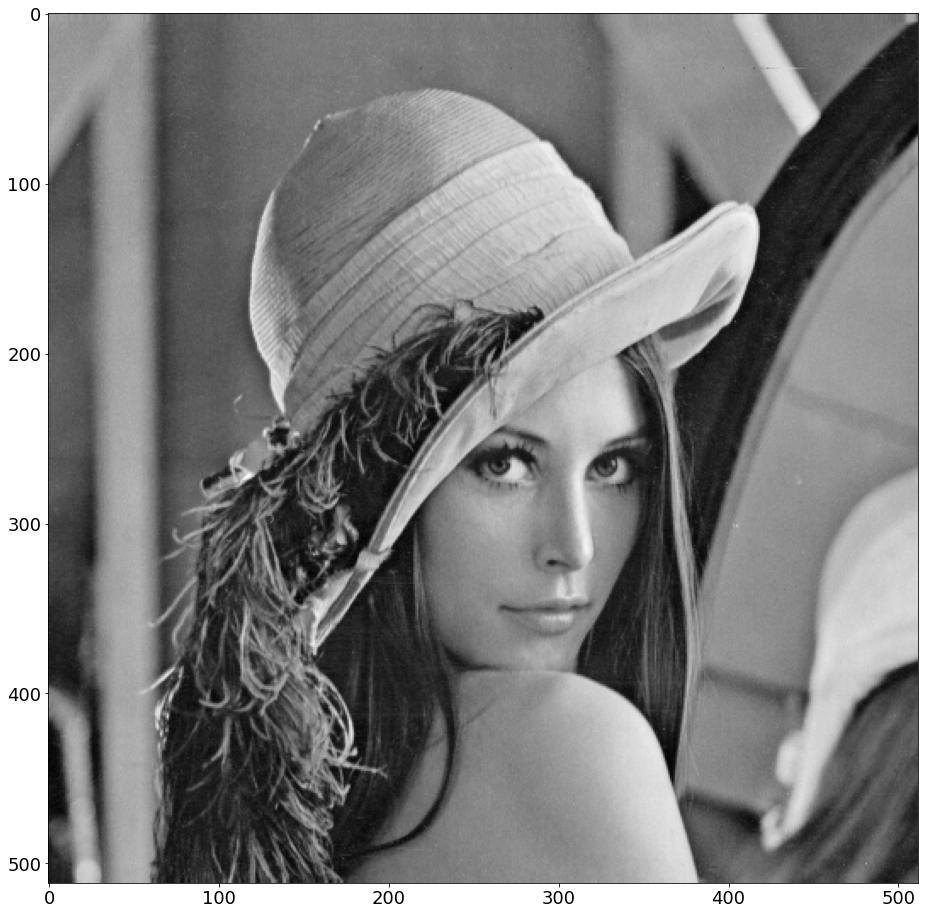

In [1]:
import numpy as np
import pywt
import pywt.data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})
img = mpimg.imread('Lenna.jpg')
img = np.mean(img,-1)#zamiana na obraz czarnobiały
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [2]:
#nazwa użytej falki
wname = 'db1'
#poziom dekompozyji
n = 4 
#tryb (zalecany 'periodization' dla każdego z obrazów)

#przetworzony obraz zostaje przechowany w formie listy gdzie elementy oznaczają następująco
#0 -> (array) warstwa przybliżająca danego poziomu falki
#1 -> (tuple3 of arrays) warstwa detali dla ostatniego poziomu dekompozycji 
C = pywt.wavedec2(img,wavelet=wname,level=n,mode='periodization',axes=(-2,-1))

# oryginał obrazu uzyskany za pomocą odwrócenia operacji dekompozycji falkowej
imgr = pywt.waverec2(C,wavelet=wname,mode='periodization',axes=(-2,-1))
imgr = np.uint(imgr)

#Normalizacja wyników
C[0] /= np.abs(C[0]).max()
for detail_level in range(n):
    C[detail_level + 1] = [d/np.abs(d).max() for d in C[detail_level + 1]]
#uzyskanie każdej z warstwy dekompozycji obrazu
#warstwa przybliżenia poziom 2
cA2 = C[0]
#warstwa detali (horizontal,vertical,diagonal)
#poziom 1
(cH1,cV1,cD1) = C[-1]
#poziom 2
(cH2,cV2,cD2) = C[-2]

arr, coeff_slices = pywt.coeffs_to_array(C)

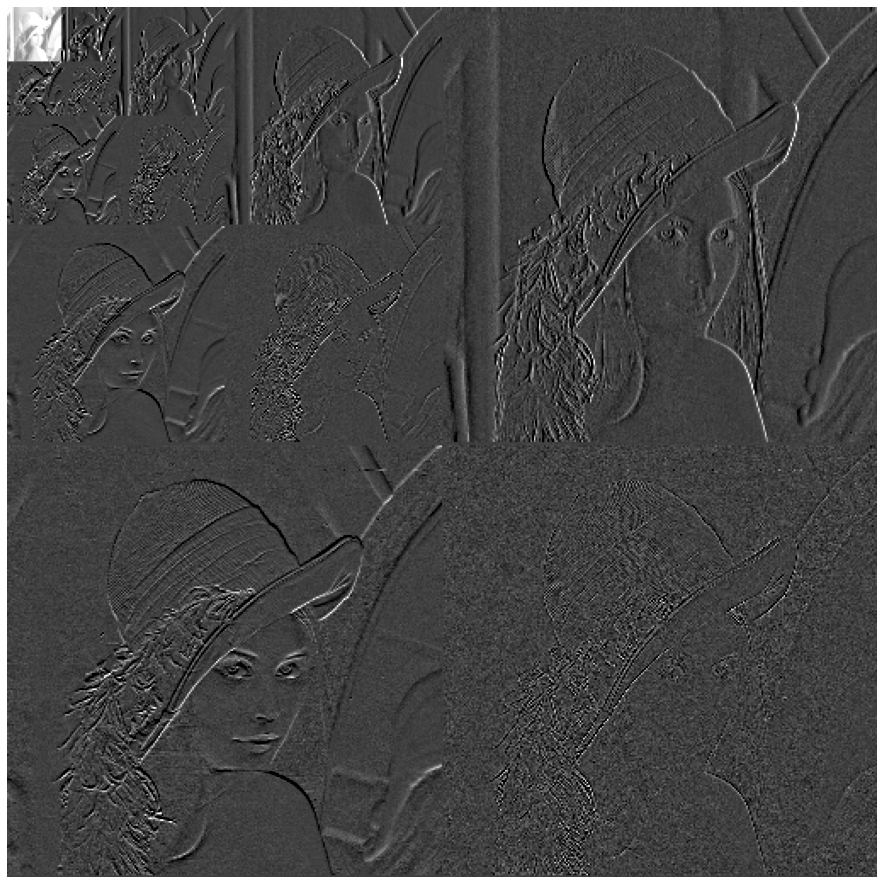

In [3]:
#prezentacja rezulatatów
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.axis('off')
plt.show()

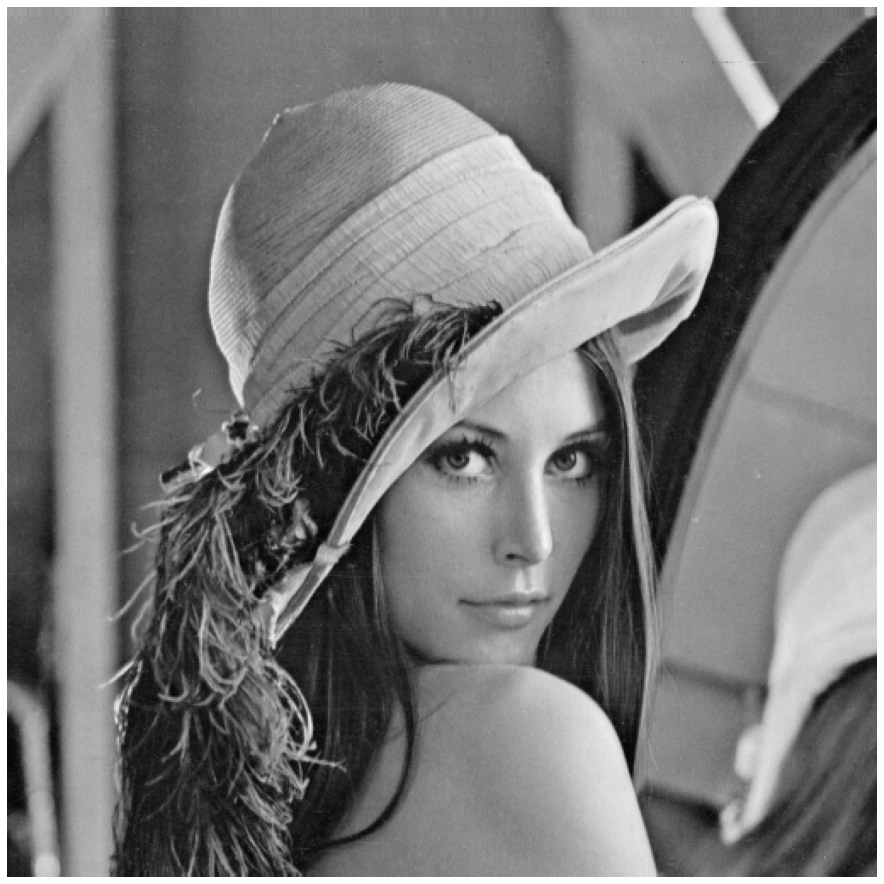

In [4]:
#wyniki odwrócenia operacji falki
plt.axis('off')
plt.imshow(imgr, cmap=plt.get_cmap("gray"))

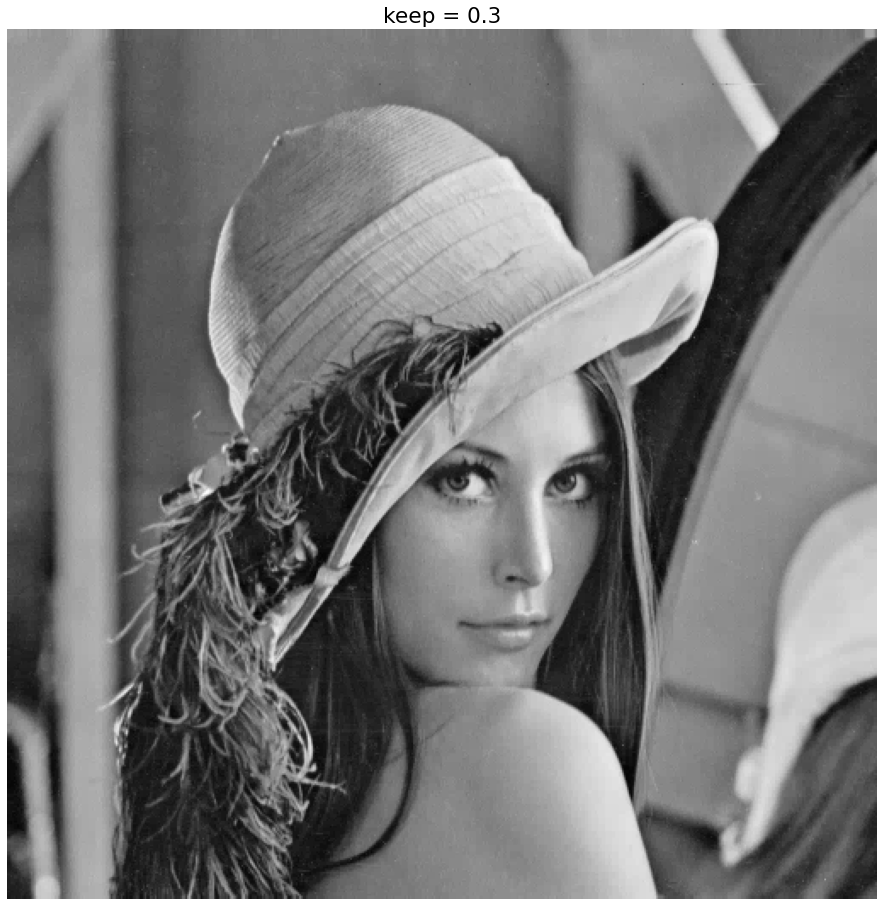

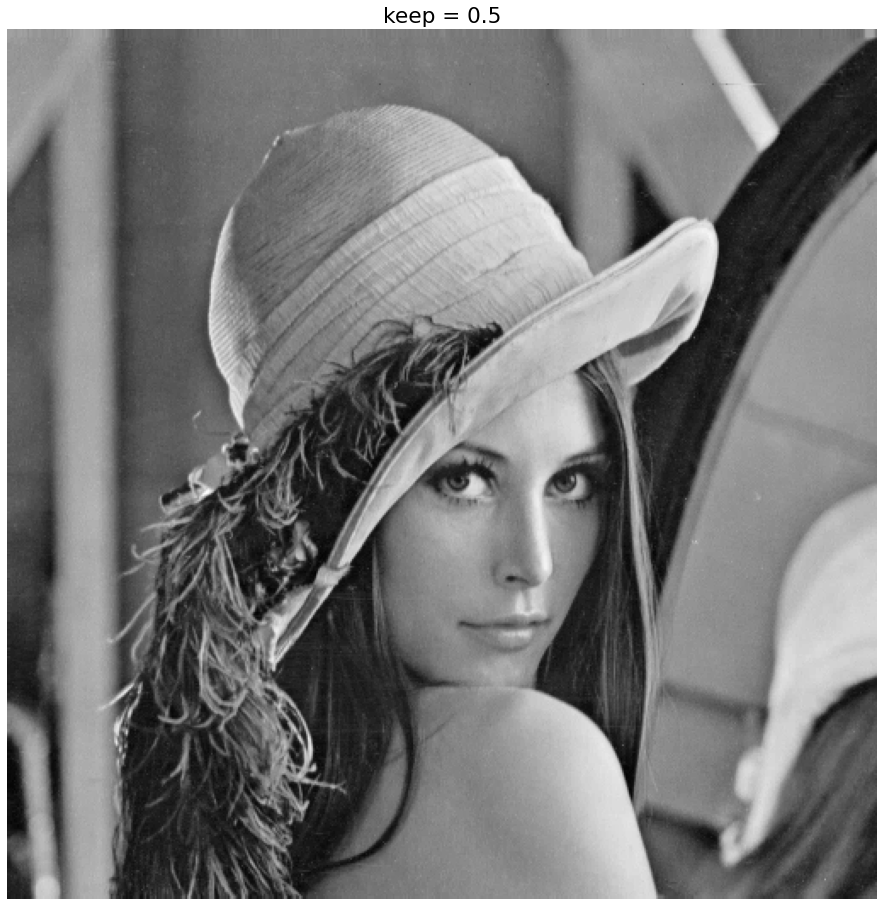

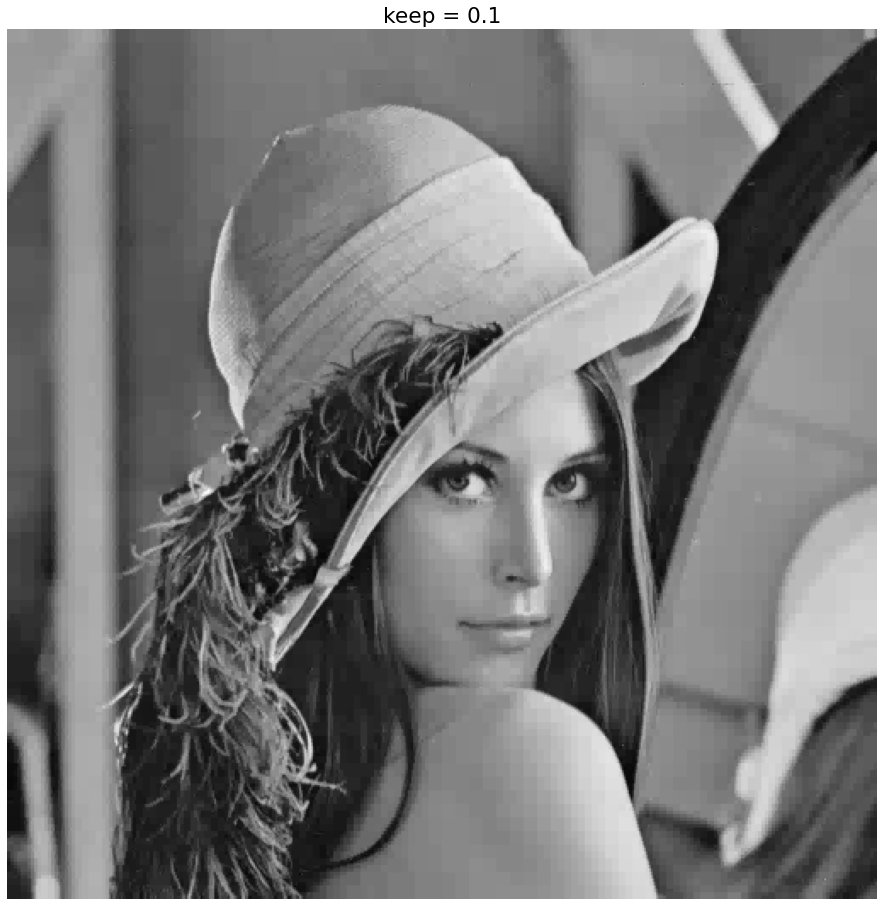

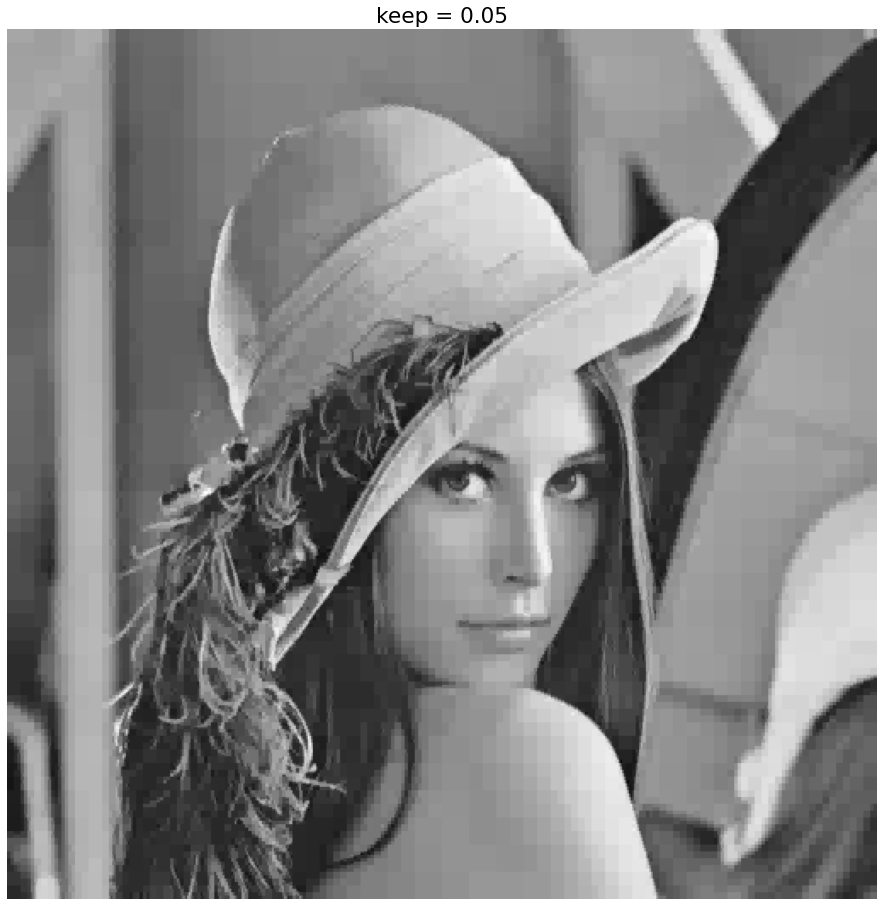

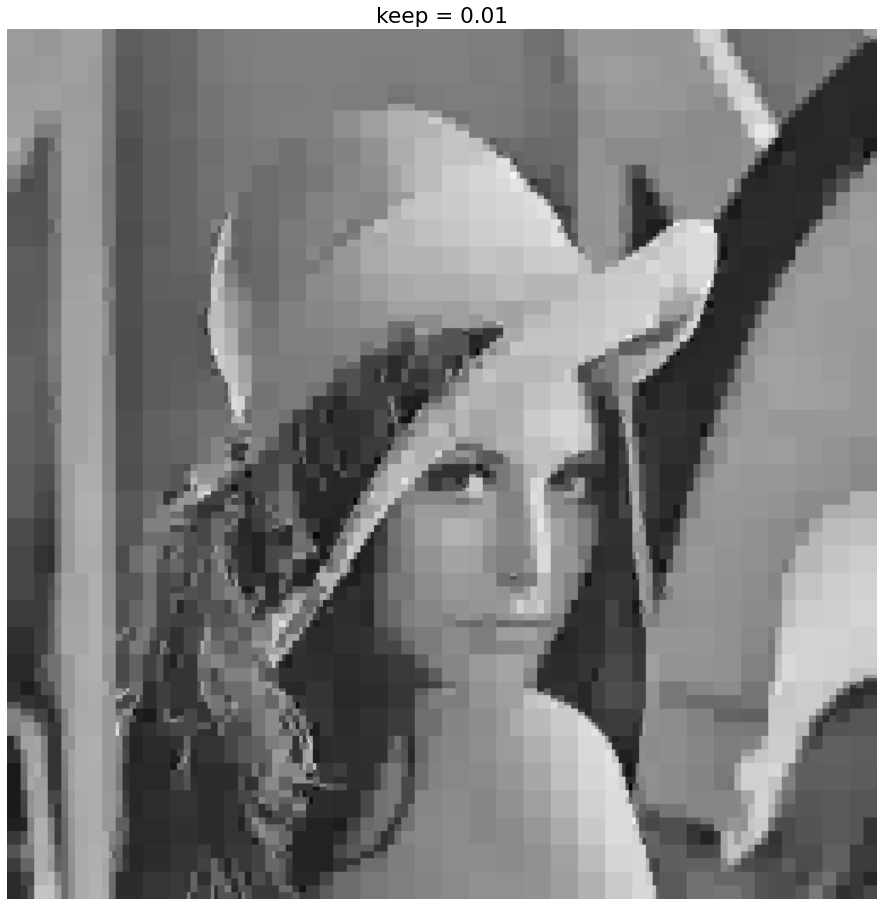

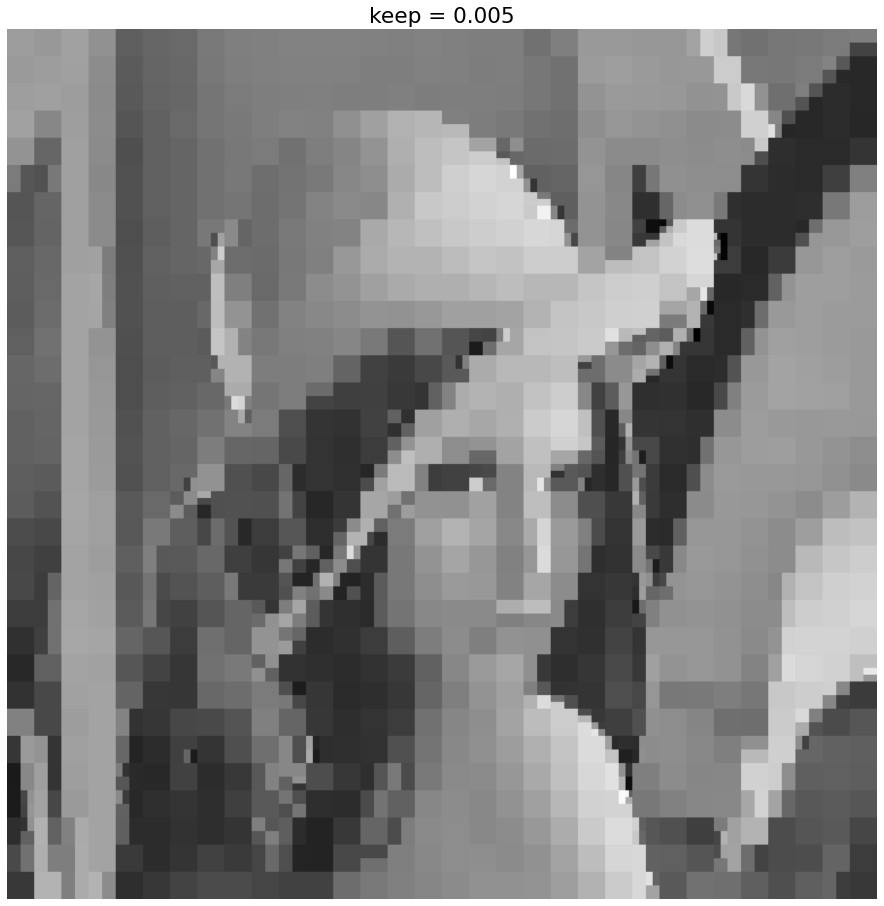

In [5]:
coeffs = pywt.wavedec2(img,wavelet=wname,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.3,0.5,0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=wname)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))
    plt.imsave('lenacompressed'+str(keep)+'.png',Arecon.astype('uint8'),cmap = 'gray')